In [7]:
import tensorflow as tf

In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [10]:
x_train.shape

(60000, 28, 28)

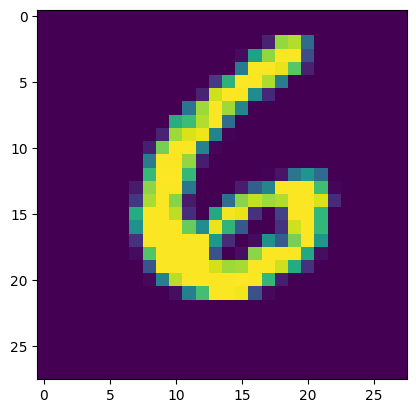

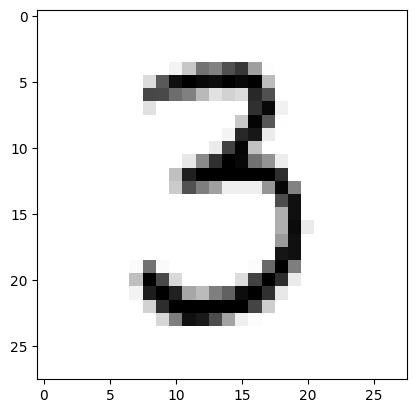

In [16]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[90])
plt.show()
 
plt.imshow(x_train[50], cmap = plt.cm.binary)
plt.show()

In [21]:
# checking the values of each pixel before normalization
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

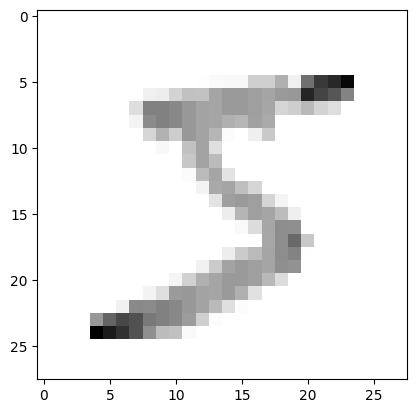

In [23]:
# noramlizing the data | pre-Processing step
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis= 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [24]:
# After normalization
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [25]:
print(y_train[0])


5


In [28]:
# resizing image to make it suitable for convolution operation
import numpy as np
IMG_SIZE=28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE, IMG_SIZE, 1) #increasing one dimension for kernel=filter operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training samples dimension", x_trainr.shape)
print("Testing samples dimension", x_testr.shape)



Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


In [37]:
#creating a deep neural network
###Training on 60,000 samples of MNIST handwritten dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [44]:
###creating a neural network now
model = Sequential()

####first convolution layer 28-3+1 = 26
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:])) #only for first convolution layer to mention input layer size
model.add(Activation("relu")) #activation function to make it non-linear 
model.add(MaxPooling2D(pool_size=(2,2))) #maxpooling single maximum value of 2x2

####second convolution layer 
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

####third convolution layer 
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

####fullly connected layer  #1 20x20
model.add(Flatten()) #before using fully connected layer, need to flatten so that 2d to 1d
model.add(Dense(64)) 
model.add(Activation("relu"))

####fullly connected layer  #2
model.add(Dense(32)) 
model.add(Activation("relu"))

####last fully connected layer, output must be equal to number of classes, 10 (0-9)
model.add(Dense(10))  #this dense layer must be equal to 10
model.add(Activation("softmax"))




In [45]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
print("total Training Samples = ", len(x_trainr))

total Training Samples =  60000


In [53]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"])

In [55]:
model.fit(x_trainr, y_train, epochs=5, validation_split = 0.3) ## training my model

2024-04-27 23:03:29.039344: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 131712000 exceeds 10% of free system memory.


Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.9554 - loss: 0.1428 - val_accuracy: 0.9652 - val_loss: 0.1110
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.9730 - loss: 0.0875 - val_accuracy: 0.9754 - val_loss: 0.0862
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.9797 - loss: 0.0661 - val_accuracy: 0.9716 - val_loss: 0.0919
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.9840 - loss: 0.0527 - val_accuracy: 0.9767 - val_loss: 0.0788
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.9865 - loss: 0.0420 - val_accuracy: 0.9826 - val_loss: 0.0594


In [57]:
###Evaluating on testing data set MNIST
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9780 - loss: 0.0690
Test loss on 10,000 test samples 0.05657944828271866
Validation Accuracy on 10,000 test samples 0.9832000136375427


In [58]:
predictions = model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [59]:
print(predictions)

[[2.1123796e-08 7.3783949e-06 1.8306910e-04 ... 9.9979711e-01
  8.7432383e-08 3.3085860e-06]
 [4.2535885e-06 2.1312060e-07 9.9998254e-01 ... 1.6461062e-06
  9.1501161e-06 2.2841424e-07]
 [1.1482110e-06 9.9995583e-01 6.7628676e-08 ... 4.6924424e-06
  2.3325777e-06 6.0078958e-07]
 ...
 [1.3957775e-11 6.8462866e-09 1.7842217e-08 ... 1.0193202e-07
  1.1911311e-07 3.8581573e-05]
 [4.5646384e-09 1.9529322e-14 1.4351084e-13 ... 2.5127724e-13
  1.3394960e-06 1.4356863e-07]
 [2.9123737e-04 1.0200992e-08 3.8785036e-04 ... 2.0140474e-08
  1.1470210e-03 5.4786186e-04]]


In [60]:
print(np.argmax(predictions[0]))

7


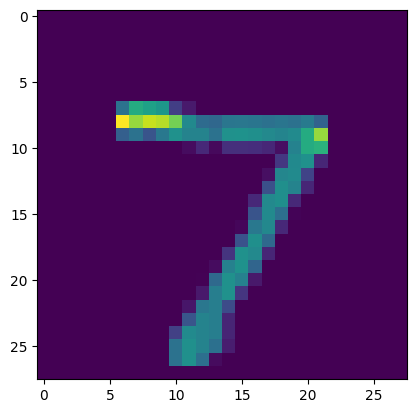

In [61]:
plt.imshow(x_test[0])

In [67]:
print(np.argmax(predictions[9999]))

6


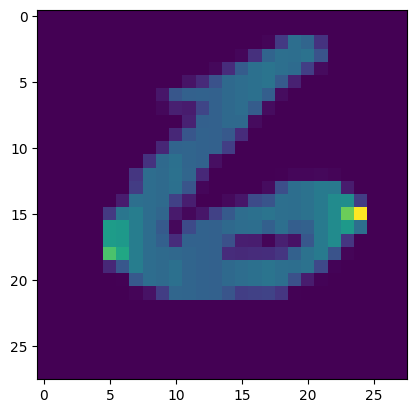

In [68]:
plt.imshow(x_testr[9999])